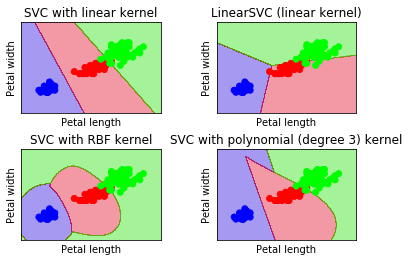

In [1]:
from sklearn.datasets import load_iris
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt


if __name__ == '__main__':

    iris = load_iris()
    feature_set = iris.data[:, 2:]  # we only take the last two features.
    label_set = iris.target
    C = 1.0  # SVM regularization parameter

    # SVC with linear kernel
    svc = svm.SVC(kernel='linear', C=C).fit(feature_set, label_set)
    # LinearSVC (linear kernel)
    lin_svc = svm.LinearSVC(C=C).fit(feature_set, label_set)
    # SVC with RBF kernel
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(feature_set, label_set)
    # SVC with polynomial (degree 3) kernel
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(feature_set, label_set)

    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = feature_set[:, 0].min() - 1, feature_set[:, 0].max() + 1
    y_min, y_max = feature_set[:, 1].min() - 1, feature_set[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']

    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.4)

        # Plot also the training points
        plt.scatter(feature_set[:, 0], feature_set[:, 1], c=label_set, cmap=plt.cm.brg)
        plt.xlabel('Petal length')
        plt.ylabel('Petal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()